# Homework 08 of "Data Mining"

### Name：階戸弾
### Student ID number：1224525046

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
import graphviz
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_iris

## 1. Train a decision tree for dataset Iris and visualize the rules for classification.

### Load dataset Iris and check the details.

In [58]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [59]:
X = iris.data
print('Shape of X:', X.shape,'\n\n')
print('Feature names')
iris.feature_names

Shape of X: (150, 4) 


Feature names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [60]:
y = iris.target
print('Target names')
iris.target_names

Target names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

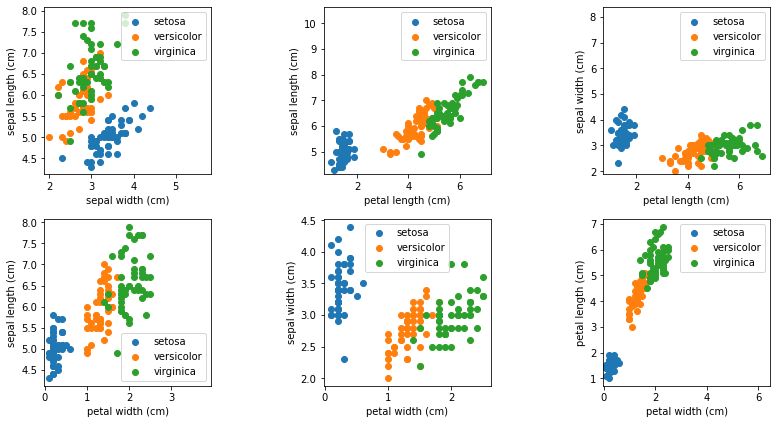

In [61]:
plt.figure(figsize=(12,6))
cnt=1
for i in range(4):
    for j in range(i):
        plt.subplot(2,3,cnt)
        for k in range(3):
            n = (y==k)
            plt.scatter(X[n,i], X[n,j], label=iris.target_names[k])
        plt.legend()
        plt.xlabel(iris.feature_names[i])
        plt.ylabel(iris.feature_names[j])
        plt.axis('square')
        cnt += 1
plt.tight_layout()
plt.show()

## Training by decision tree

In [62]:
# describe your code
model = tree.DecisionTreeClassifier()
model = model.fit(X, y)

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

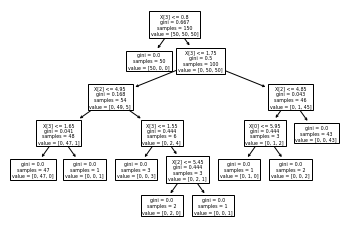

In [63]:
tree.plot_tree(model)

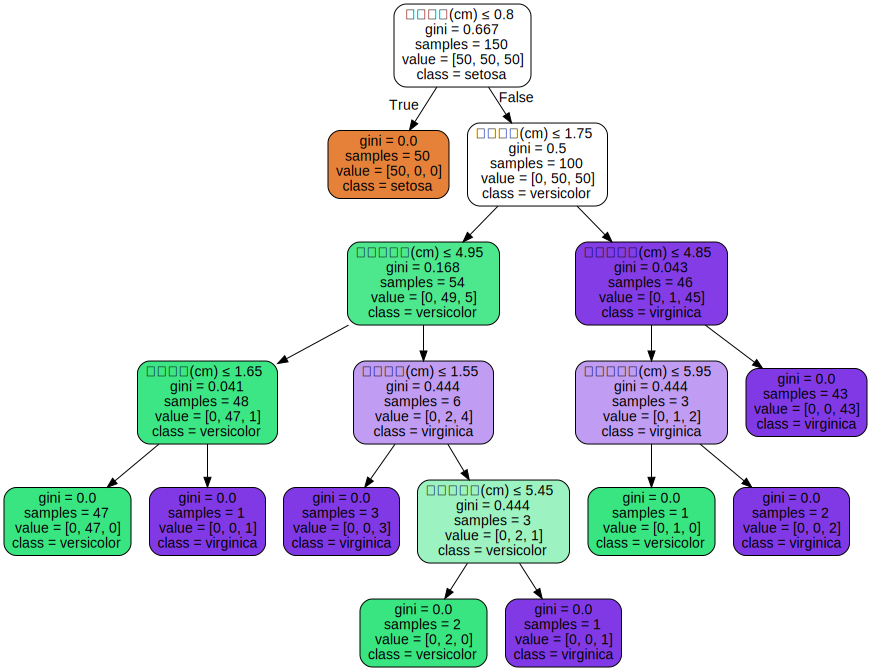

In [64]:
feature_names = ['ガクの長さ(cm)', 'ガクの幅(cm)', '花弁の長さ(cm)', '花弁の幅(cm)']
target_names = ['setosa', 'versicolor', 'virginica']
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names,
                                class_names=target_names, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Disscussion

分布図から花弁が分類に適した特徴量であると予測できる。また、決定木から花弁の幅がsetosaの分類に適していることが分かり、花弁の長さでversicolorとvirginicaを大まかに分類できる。このことからガクの特徴量より花弁の特徴の方が分類に適していると予想できる。

## ２. Train a random forest for the same dataset and discuss feature importance.

## Train random forest

In [65]:
# describe your code
model2 = RandomForestClassifier(n_estimators=50)
model2.fit(X, y)

RandomForestClassifier(n_estimators=50)

## Visualize feature importance

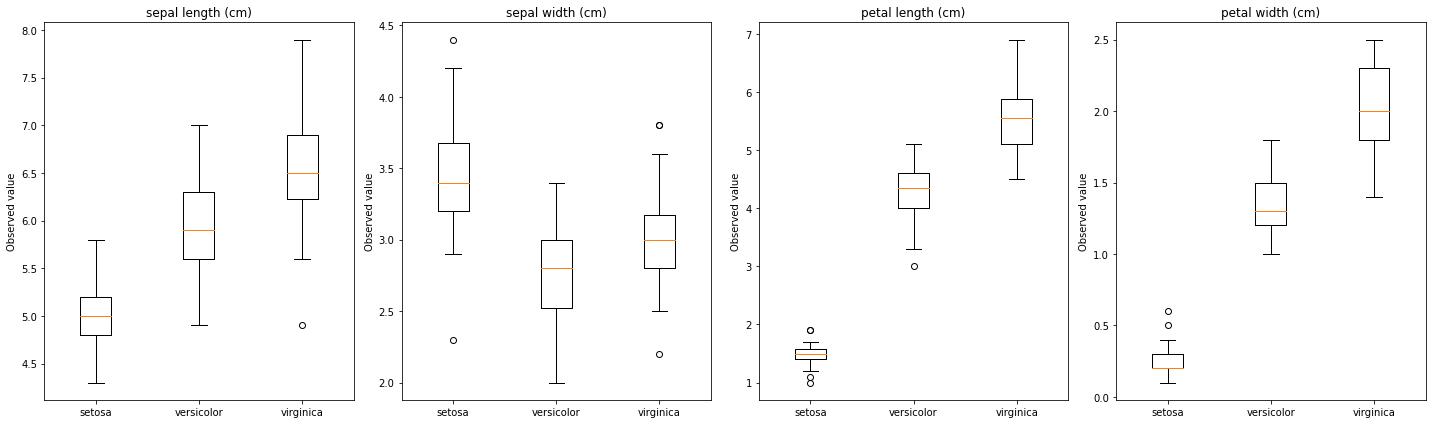

Feature importance:


array([0.10211278, 0.02151534, 0.41725754, 0.45911434])

In [70]:
# describe your code

plt.figure(figsize=(20,6))
for n in range(4):
    plt.subplot(1,4,n+1)
    plt.boxplot([X[y==0,n], X[y==1,n], X[y==2,n]] ,labels=['setosa', 'versicolor', 'virginica'])
    plt.ylabel('Observed value')
    plt.title(iris.feature_names[n])
plt.tight_layout()
plt.show()

print('Feature importance:')
model2.feature_importances_

## Discussion

決定木から花弁の特徴量が分類に適していると予測できたが、実際の特徴量の重要値からも花弁が分類に適していることが分かる。setosaは花弁がの幅と長さが短いがガクの長さは個体ごとに大きく違う。virginicaは花弁が大きくガクに大きな特徴はない。versicolorは花弁がsetosaより大きいがvirginicaより小さい。
setosaは花弁の大きさで高い純度で分類できるが、versicolorとvirginicaは大まかに分類はできるものの例外が混ざっていることがある。